In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
df = pd.read_csv("schematic/data/SCbandgap-30C7p56.csv",delimiter="\s+").rename(columns={"currtemp":"temp"})

In [203]:
df["temp"] = np.ones(len(df.time))*df.iloc[0].temp
df["vout_abs"] = df["v(vout)"]-df["v(vref)"]

In [204]:
df

,time,v(vbep),time.1,v(vben),time.2,v(vout),time.3,v(vphi1),time.4,v(vphi2),time.5,v(vref),yes,temp,vout_abs
0,0.000000e+00,0.774243,0.000000e+00,0.729755,0.000000e+00,0.072172,0.000000e+00,0.000,0.000000e+00,1.799981,0.000000e+00,0.5,1.0,-30.0,-0.427828
1,5.000000e-12,0.774231,5.000000e-12,0.729745,5.000000e-12,0.072617,5.000000e-12,0.018,5.000000e-12,1.800055,5.000000e-12,0.5,NaN,-30.0,-0.427383
2,1.000000e-11,0.774219,1.000000e-11,0.729735,1.000000e-11,0.073013,1.000000e-11,0.036,1.000000e-11,1.800091,1.000000e-11,0.5,NaN,-30.0,-0.426987
3,2.000000e-11,0.774196,2.000000e-11,0.729715,2.000000e-11,0.073735,2.000000e-11,0.072,2.000000e-11,1.800122,2.000000e-11,0.5,NaN,-30.0,-0.426265
4,4.000000e-11,0.774148,4.000000e-11,0.729676,4.000000e-11,0.074855,4.000000e-11,0.144,4.000000e-11,1.800100,4.000000e-11,0.5,NaN,-30.0,-0.425145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,1.960300e-04,0.866936,1.960300e-04,0.819750,1.960300e-04,0.850310,1.960300e-04,0.000,1.960300e-04,1.798863,1.960300e-04,0.5,NaN,-30.0,0.350310
803,1.970300e-04,0.866936,1.970300e-04,0.819750,1.970300e-04,0.852793,1.970300e-04,0.000,1.970300e-04,1.801140,1.970300e-04,0.5,NaN,-30.0,0.352793
804,1.980300e-04,0.866936,1.980300e-04,0.819750,1.980300e-04,0.854768,1.980300e-04,0.000,1.980300e-04,1.798863,1.980300e-04,0.5,NaN,-30.0,0.354768
805,1.990300e-04,0.866936,1.990300e-04,0.819750,1.990300e-04,0.856593,1.990300e-04,0.000,1.990300e-04,1.801140,1.990300e-04,0.5,NaN,-30.0,0.356593


In [205]:
%matplotlib inline

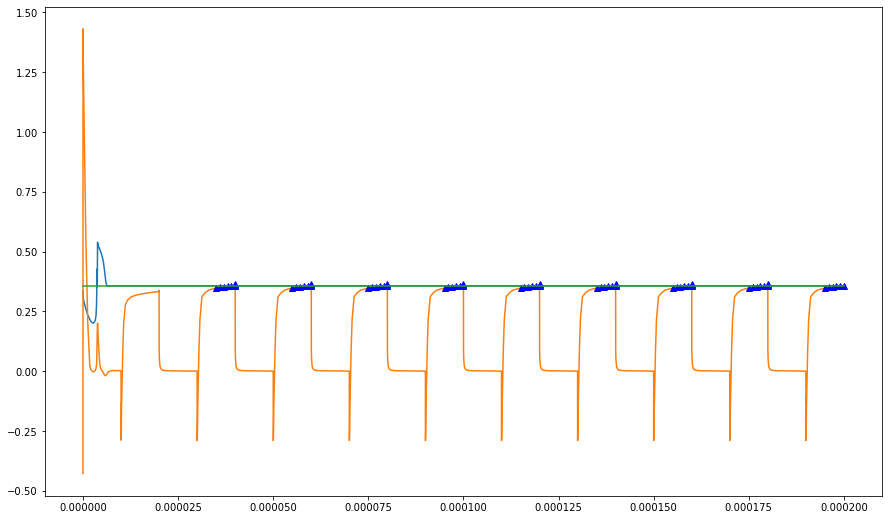

In [206]:
fig, ax = plt.subplots(figsize=(15,9))
gain=7.56
ax.plot(df.time, (df["v(vbep)"]-df["v(vben)"])*gain)
ax.plot(df.time, df.vout_abs)

# i=-5
# ax.plot(df.time.iloc[i], df["v(vbep)"].iloc[i]-df["v(vben)"].iloc[i],"rx",markersize=15)
# ax.plot(df.time.iloc[i], df.vout_abs.iloc[i],"r+",markersize=15)

sel = np.abs(df.vout_abs-(df["v(vbep)"].iloc[-1]*gain-df["v(vben)"].iloc[-1]*gain))<0.011
# ax.plot(df.time[sel], df["v(vbep)"][sel]-df["v(vben)"][sel], "b")
ax.plot(df.time[sel], df.vout_abs[sel],"b^")
ax.plot(df.time, df.vout_abs*0+np.mean(df.vout_abs[sel]))
# ax.set_ylim([0, 0.2])

In [256]:
sc_vout = []
sc_temp = []
del_vbe = []
vbp = []
vbn = []
for j in np.arange(-10,100,1):
    df = pd.read_csv("schematic/data/SCbandgap"+str(j)+"C7p67.csv",delimiter="\s+").rename(columns={"currtemp":"temp"})
    df["temp"] = np.ones(len(df.time))*df.iloc[0].temp
    df["vout_abs"] = df["v(vout)"]-df["v(vref)"]
    
    i=-5
    gain=7.67
    sel = np.abs(df.vout_abs-(df["v(vbep)"].iloc[-1]*gain-df["v(vben)"].iloc[-1]*gain))<0.02
    sc_temp.append(df.iloc[0].temp)
    sc_vout.append(np.mean(df.vout_abs[sel]))
    del_vbe.append(df["v(vbep)"].iloc[i]*gain-df["v(vben)"].iloc[i]*gain)
    vbp.append(df["v(vbep)"].iloc[i])
    vbn.append(df["v(vben)"].iloc[i])
    
sc_vout = np.array(sc_vout)
sc_temp = np.array(sc_temp)
del_vbe = np.array(del_vbe)
vbn = np.array(vbn)

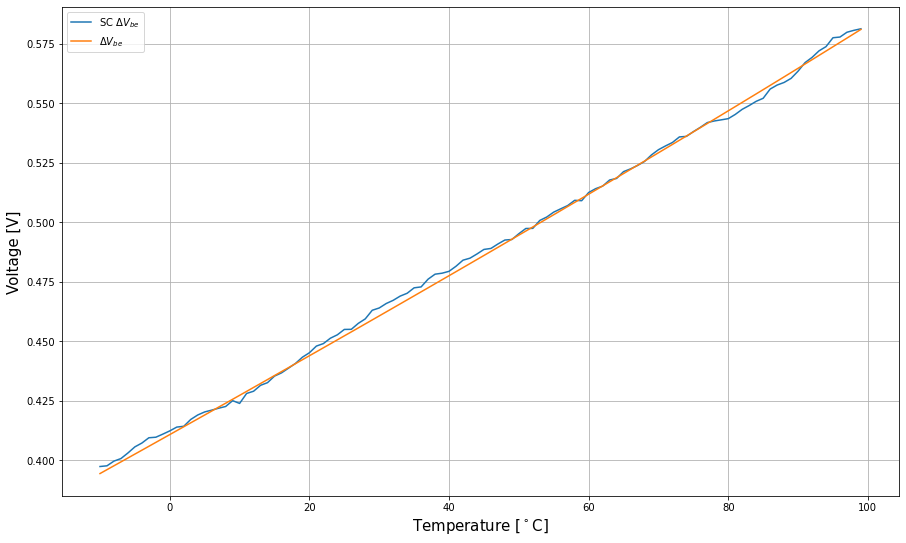

In [272]:
fig, ax = plt.subplots(figsize=(15,9))

# ax.plot(df.time, df["v(vbep)"]-df["v(vben)"])
ax.plot(sc_temp, sc_vout, label="SC $\Delta V_{be}$")
ax.plot(sc_temp, del_vbe, label="$\Delta V_{be}$")
# ax.plot(sc_temp, vbn)
# ax.set_ylim([0, 0.09])
ax.set_xlabel("Temperature [$^\circ$C]", size=15)
ax.set_ylabel("Voltage [V]", size=15)
ax.grid()
ax.legend()

Text(0, 0.5, 'Reference Voltage [V]')

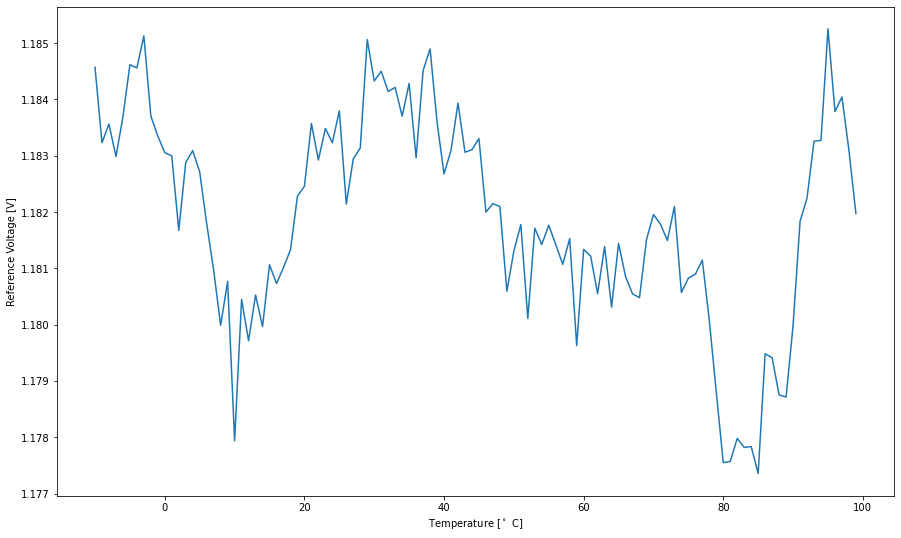

In [261]:
fig, ax = plt.subplots(figsize=(15,9))

# ax.plot(df.time, df["v(vbep)"]-df["v(vben)"])
ax.plot(sc_temp, sc_vout+vbn)
# ax.plot(sc_temp, del_vbe+vbn)
# ax.set_ylim([0, 0.09])
ax.set_xlabel("Temperature [$^\circ$ C]")
ax.set_ylabel("Reference Voltage [V]")

In [226]:
np.mean(vbn[:-1]-vbn[1:])

0.0016906971726618708

In [238]:
tmp = vbp - vbn
np.mean(tmp[:-1]-tmp[1:])

-0.0002204988345323743

In [239]:
np.mean(vbn[:-1]-vbn[1:])/np.mean(tmp[:-1]-tmp[1:])

-7.667601401374472

In [169]:
(df["v(vbep)"]-df["v(vben)"]).diff()

0               NaN
1     -2.497000e-06
2     -2.584000e-06
3     -5.153000e-06
4     -1.027500e-05
           ...     
765   -1.220000e-06
766    1.082000e-06
767   -9.370000e-07
768    7.880000e-07
769   -6.370000e-07
Length: 770, dtype: float64

In [168]:
df["v(vben)"].diff()

0           NaN
1     -0.000012
2     -0.000012
3     -0.000024
4     -0.000048
         ...   
765   -0.000006
766    0.000006
767   -0.000005
768    0.000004
769   -0.000003
Name: v(vben), Length: 770, dtype: float64

In [170]:
np.mean((df["v(vbep)"]-df["v(vben)"]).diff())

1.0571907672301755e-05